In [1]:
import sys
import cv2
import numpy as np
from math import * 
import os
from matplotlib import pyplot as plt

In [2]:
%run Match.ipynb
%run RANSAC.ipynb

In [3]:
class structureFromMotion(Match, RANSAC):
    
    def __init__(self, numberOfImages=None):
        self.numberOfImages = numberOfImages
        self.baseAddress = os.getcwd() + "/P3Data/"
    
    def showImage(self, image):
        plt.imshow(image)
        return None
    
    def matchTwoImages(self, image1, image2):
        matches = self.featureMatching(image1, image1)
        return matches
    
    def getFundamentalMatrix(self):
        matches = structure.featureMatching(descriptorsImage1, descriptorsImage2)
        F = structure.ransacAlgorithm(matches, keyPoints1, keyPoints2)
        
    def extractKeyPoints():
        return None
    
    def drawlines(self, img1, img2, lines, pts1, pts2):
        r,c = img1.shape
        img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
        img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
        
        for r, pt1, pt2 in zip(lines, pts1, pts2):
            color = tuple(np.random.randint(0, 255, 3).tolist())
            x0, y0 = map(int, [0, -r[2]/r[1] ])
            x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
            img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
            img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
            img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
        
        return img1,img2

In [4]:
structure = structureFromMotion()

In [23]:
imageFile = "2.png"
image2File = "3.png"
imageAddress = structure.baseAddress + imageFile
image2Address = structure.baseAddress + image2File
image1 = cv2.imread(imageAddress, 0)
image2 = cv2.imread(image2Address, 0)

In [24]:
keyPoints1, descriptorsImage1 = structure.featureExtraction(image1)
keyPoints2, descriptorsImage2 = structure.featureExtraction(image2)
keyPoints1 = np.array([p.pt for p in keyPoints1])
keyPoints2 = np.array([p.pt for p in keyPoints2])

In [25]:
matches = structure.featureMatching(descriptorsImage1, descriptorsImage2)

In [26]:
P1 = np.array([pt.queryIdx for pt in matches])
P2 = np.array([pt.trainIdx for pt in matches])

keyPoints1Matched = keyPoints1[P1]
keyPoints2Matched = keyPoints2[P2]

In [27]:
F, mask = structure.fundamentalMatCV(keyPoints1Matched, keyPoints2Matched)

In [28]:
pts1 = keyPoints1Matched[mask.ravel() == 1]
pts2 = keyPoints2Matched[mask.ravel() == 1]

In [29]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

In [30]:
Point1 = pts1.tolist()
Point2 = pts2.tolist()

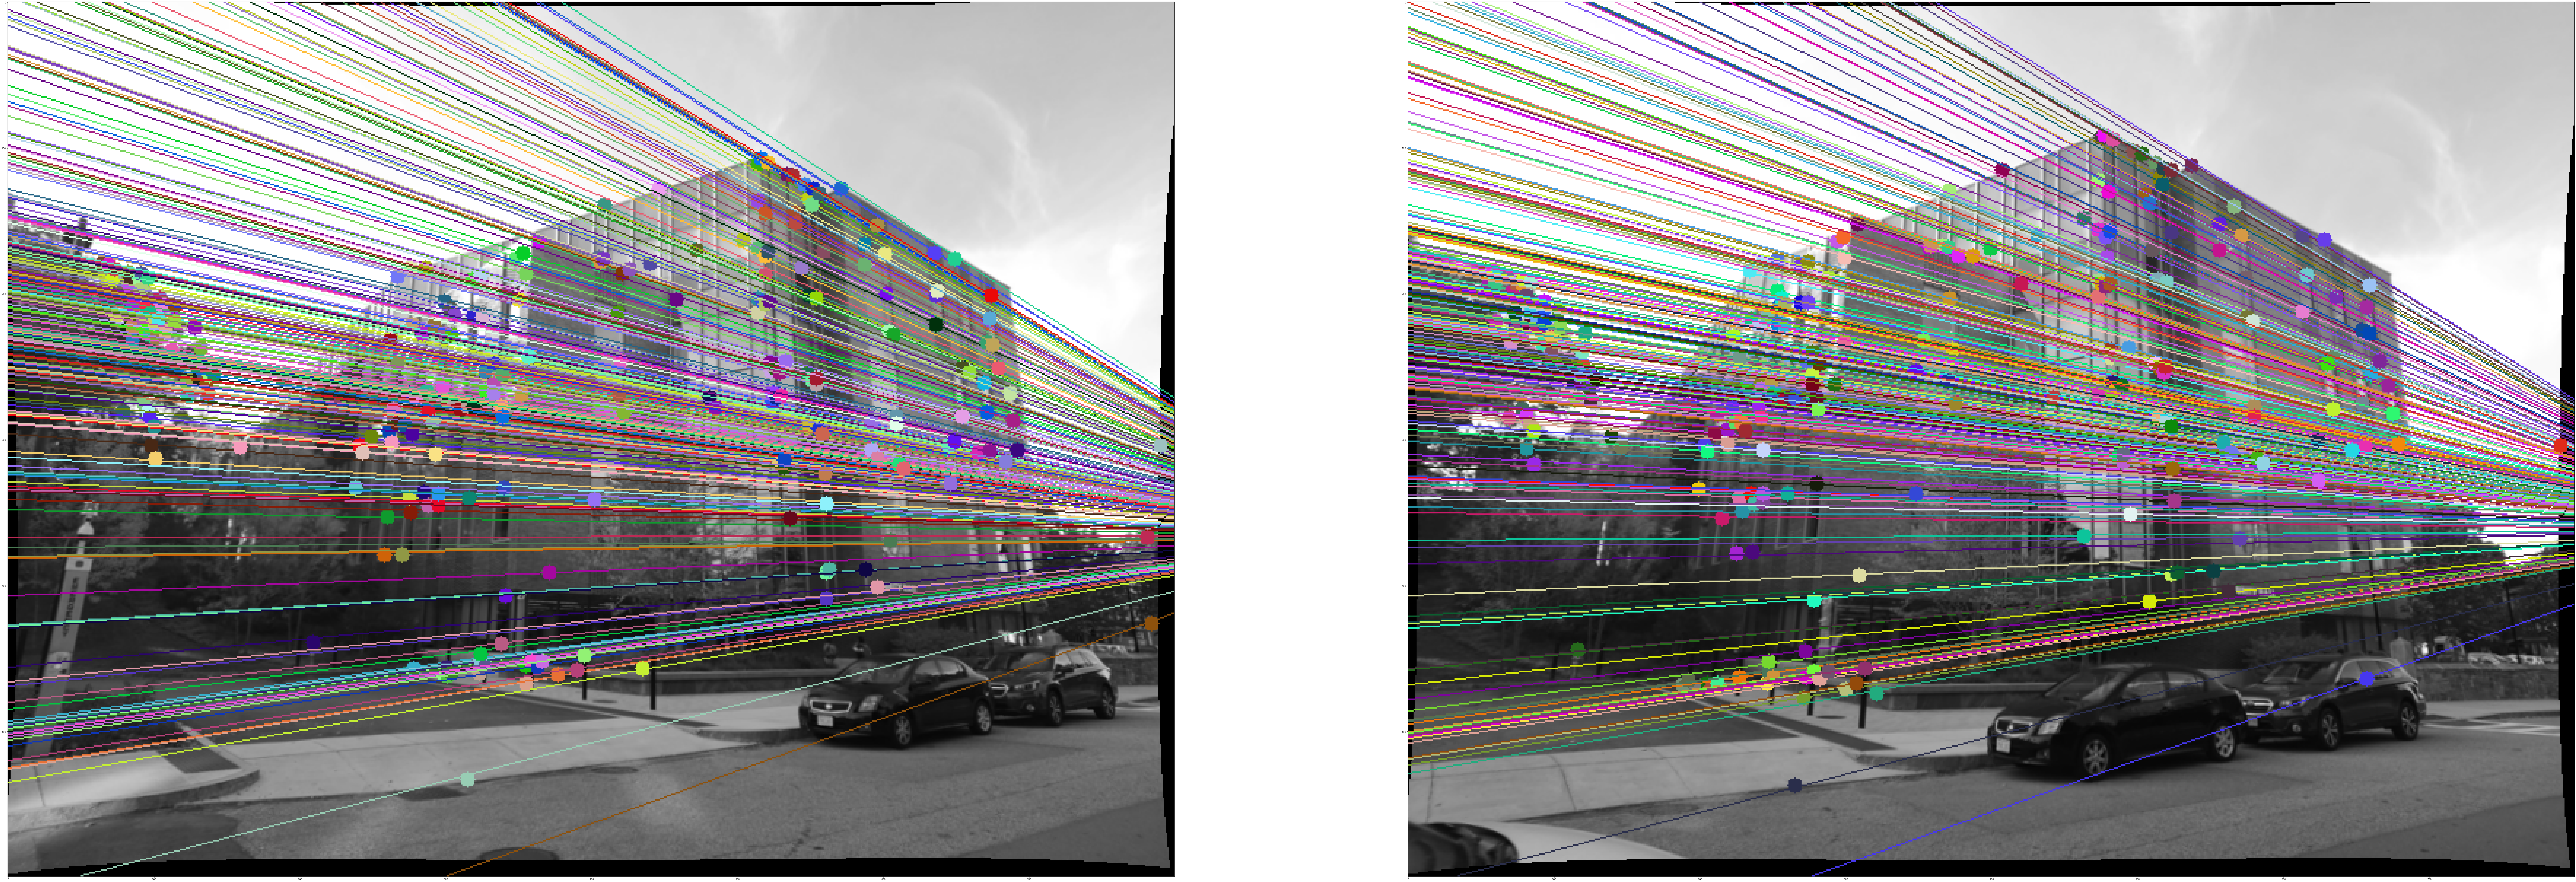

In [31]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2, F)
lines1 = lines1.reshape(-1,3)
img5,img6 = structure.drawlines(image1, image2, lines1, pts1, pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1, F)
lines2 = lines2.reshape(-1,3)
img3,img4 = structure.drawlines(image2, image1, lines2, pts2, pts1)

plt.figure(figsize=(200,200))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [ ]:
plt.subplot(121),plt.imshow(img6)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [ ]:
# import numpy as np
# import cv2 as cv
# from matplotlib import pyplot as plt
# img1 = cv.imread('/home/deveshdatwani/Slam/P3Data/1.png', cv.IMREAD_GRAYSCALE)  #queryimage # left image
# img2 = cv.imread('/home/deveshdatwani/Slam/P3Data/2.png', cv.IMREAD_GRAYSCALE) #trainimage # right image
# sift = cv.SIFT_create()
# # find the keypoints and descriptors with SIFT
# kp1, des1 = sift.detectAndCompute(img1,None)
# kp2, des2 = sift.detectAndCompute(img2,None)
# # FLANN parameters
# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# search_params = dict(checks=50)
# flann = cv.FlannBasedMatcher(index_params,search_params)
# matches = flann.knnMatch(des1,des2,k=2)
# pts1 = []
# pts2 = []

# # ratio test as per Lowe's paper
# for i,(m,n) in enumerate(matches):
#     if m.distance < 0.8*n.distance:
#         pts2.append(kp2[m.trainIdx].pt)
#         pts1.append(kp1[m.queryIdx].pt)
        
# pts1 = np.int32(pts1)
# pts2 = np.int32(pts2)
# F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
# # We select only inlier points
# pts1 = pts1[mask.ravel()==1]
# pts2 = pts2[mask.ravel()==1]

# def drawlines(img1,img2,lines,pts1,pts2):
#     ''' img1 - image on which we draw the epilines for the points in img2
#         lines - corresponding epilines '''
#     r,c = img1.shape
#     img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
#     img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
#     for r,pt1,pt2 in zip(lines,pts1,pts2):
#         color = tuple(np.random.randint(0,255,3).tolist())
#         x0,y0 = map(int, [0, -r[2]/r[1] ])
#         x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
#         img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
#         img1 = cv.circle(img1,tuple(pt1),5,color,-1)
#         img2 = cv.circle(img2,tuple(pt2),5,color,-1)
#     return img1,img2

# # Find epilines corresponding to points in right image (second image) and
# # drawing its lines on left image
# lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
# lines1 = lines1.reshape(-1,3)
# img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# # Find epilines corresponding to points in left image (first image) and
# # drawing its lines on right image
# lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
# lines2 = lines2.reshape(-1,3)
# img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
# plt.figure(figsize=(200,200))
# plt.subplot(121),plt.imshow(img5)
# plt.subplot(122),plt.imshow(img3)
# plt.show()